<a href="https://colab.research.google.com/github/Anithahd/haikus-for-codespaces/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [216]:
df = pd.read_csv("car_data.csv")

In [217]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [218]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [219]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [220]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [221]:
df = df.drop_duplicates()

In [222]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [223]:
iqr = df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
upper_threshold = df['Mileage'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Mileage'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(41097.25, -1260.75)

In [224]:
df.shape

(804, 12)

In [225]:
# EDA

In [226]:
df.groupby('Mileage')['Price'].mean()

Mileage
266      10813.343521
583      70755.466717
636      25948.962594
788      48310.329545
865      16116.843916
             ...     
41566    15792.831437
41829    32537.186751
42691    52001.994379
48991    28777.959695
50387    22244.876553
Name: Price, Length: 791, dtype: float64

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


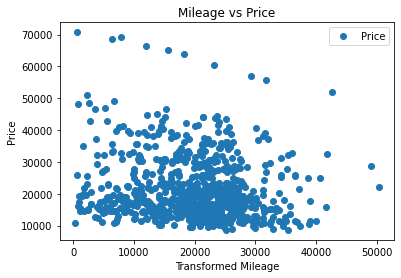

,transformed,Price
transformed,NaN,-0.0
Price,-0.0,1.0


In [227]:
#df.groupby('Mileage')['Price'].mean().plot()
df['transformed'] = np.exp(df['Mileage'])  # transformation
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Transformed Mileage')
plt.ylabel('Price')
plt.show()
df[['transformed', 'Price']].corr()

In [228]:
# In this part there is no correlation between the Mileage and Price. Have tried all the transformations so we are not able to apply the linear regression algorithm.

In [229]:
# PART 2

In [230]:
iqr = df['Cylinder'].quantile(0.75) - df['Cylinder'].quantile(0.25)
upper_threshold = df['Cylinder'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Cylinder'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(9.0, 1.0)

In [231]:
iqr = df['Liter'].quantile(0.75) - df['Liter'].quantile(0.25)
upper_threshold = df['Liter'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Liter'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.199999999999999, -0.1999999999999993)

In [232]:
iqr = df['Doors'].quantile(0.75) - df['Doors'].quantile(0.25)
upper_threshold = df['Doors'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Doors'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(4.0, 4.0)

In [233]:
iqr = df['Cruise'].quantile(0.75) - df['Cruise'].quantile(0.25)
upper_threshold = df['Cruise'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Cruise'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(1.0, 1.0)

In [234]:
iqr = df['Sound'].quantile(0.75) - df['Sound'].quantile(0.25)
upper_threshold = df['Sound'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Sound'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [235]:
iqr = df['Leather'].quantile(0.75) - df['Leather'].quantile(0.25)
upper_threshold = df['Leather'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Leather'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [236]:
df.shape

(804, 13)

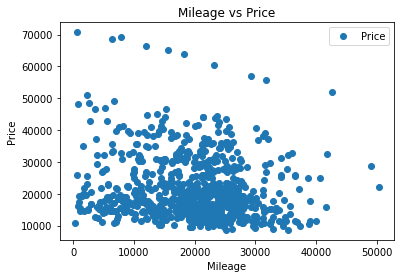

In [237]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [238]:
df[['Mileage', 'Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [239]:
# There is no linear relationship in this feature vs target variable. Have tried all the transformation before itself. So we drop this feature.

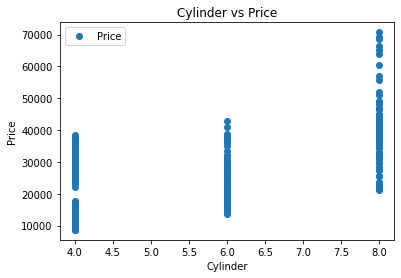

In [240]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

In [241]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


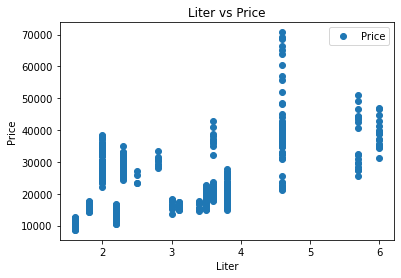

In [242]:
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

In [243]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


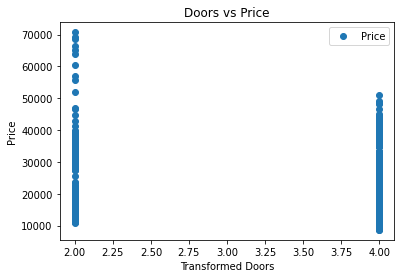

,transformed,Price
transformed,1.00000,-0.13875
Price,-0.13875,1.00000


In [244]:
df['transformed'] = np.exp(df['Doors'])  #transformation
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Transformed Doors')
plt.ylabel('Price')
plt.show()
df[['transformed', 'Price']].corr()

In [245]:
# There is no linear relationship between this feature and the target variable. Have tried all the transformations but not able to find linear relationship. So we will drop this feature.

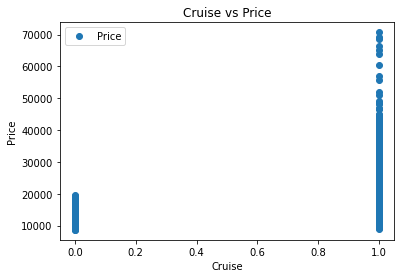

In [246]:
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [247]:
df[['Cruise', 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


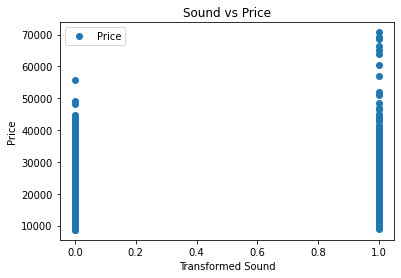

,transformed,Price
transformed,1.000000,-0.124348
Price,-0.124348,1.000000


In [248]:
df['transformed'] = np.exp(df['Sound'])
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Transformed Sound')
plt.ylabel('Price')
plt.show()
df[['transformed', 'Price']].corr()

In [249]:
# There is no linear relationship found between the feature and the target variable. Tried all the transformations. After doing transformations also there is no linear relationship so we will drop this feature.

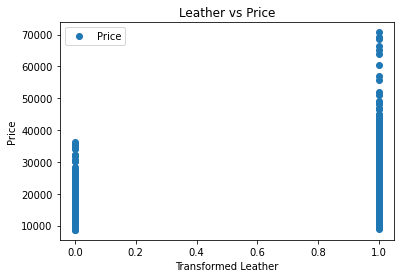

,transformed,Price
transformed,1.000000,0.157197
Price,0.157197,1.000000


In [250]:
df['transformed'] = np.exp(df['Leather'])  #transformation
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Transformed Leather')
plt.ylabel('Price')
plt.show()
df[['transformed', 'Price']].corr()

In [251]:
# There is no linear relationship found here. Have tried all the transformations but no linear relationship. So we will drop this feature.

In [252]:
X = df[['Cylinder', 'Liter', 'Cruise']].values  #array of features
y = df['Price'].values  #array of target

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
# Model Training

In [256]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [257]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise'], columns = ['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Cylinder,4009.007801
Liter,416.886060
Cruise,2704.050676


In [258]:
regressor.intercept_  #c

21240.82137630837

In [259]:
regressor.predict(scaler.transform(np.array([[7, 4.2, 1]])))

array([28386.02204855])

In [260]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,14202.997153,12632.629199
1,14894.982593,12632.629199
2,22435.202819,25309.889422
3,12243.060624,18848.634533
4,16339.170324,25039.523491
...,...,...
156,70755.466717,31462.154675
157,17316.096603,25194.018309
158,25618.281885,18771.387124
159,11464.628859,18848.634533


In [261]:
from sklearn import metrics
print('R2 - SCORE:', metrics.r2_score(y_test, y_pred))

R2 - SCORE: 0.426909152763858


In [262]:
# This model does not have a good R2 SCORE.
# On seeing the coefficient that Cylinder feature is the best predictor for Price.